# Optical Recognition of Handwritten Digits

In [32]:
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [ ]:
# fetch dataset 
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80) 

# data (as pandas dataframes) 
X = optical_recognition_of_handwritten_digits.data.features 
y = optical_recognition_of_handwritten_digits.data.targets 
  
# metadata 
print(optical_recognition_of_handwritten_digits.metadata) 
  
# variable information 
print(optical_recognition_of_handwritten_digits.variables) 

{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

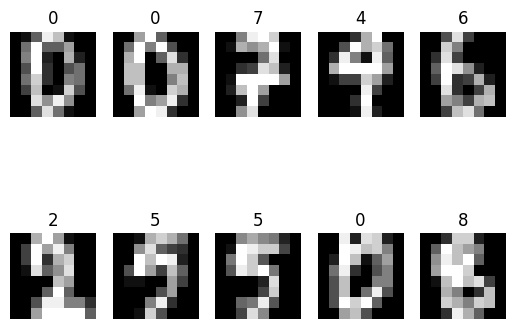

In [24]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X.iloc[i].values.reshape(8,8), cmap='gray')
    # remove axis
    plt.axis('off')
    plt.title(y["class"].iloc[i])

## First Approach using a tree based models for classification.

In [33]:
from mlflow_for_ml_dev.src.ml_core.pipelines import get_sk_pipeline

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
pipeline = get_sk_pipeline(numerical_columns=X.columns, categorical_columns=[]) 

In [38]:
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
       'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10',
       'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14',
       'Attribute15', 'Attribute16', 'Attribut...
       'Attribute43', 'Attribute44', 'Attribute45', 'Attribute46',
       'Attribute47', 'Attribute48', 'Attribute49', 'Attribute50',
       'Attribute51', 'Attribute52', 'Attribute53', 'Attribute54',
       'Attribute55', 'Attribute56', 'Attribute57', 'Attribute58',
       'Attribute59', 'Attribute60', 'Attribute61', 'Attribute62',
       'Attribute63', 'Attribute64'],
      dtype='object')),
                                                 ('encoder', OneHotEncoder(),
                                                  [])])),
                ('model', RandomForestClassifier())])

In [39]:
pipeline.fit(X_train, y_train)

c:\Users\manue\projects\mlflow_for_ml_dev\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
       'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10',
       'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14',
       'Attribute15', 'Attribute16', 'Attribut...
       'Attribute43', 'Attribute44', 'Attribute45', 'Attribute46',
       'Attribute47', 'Attribute48', 'Attribute49', 'Attribute50',
       'Attribute51', 'Attribute52', 'Attribute53', 'Attribute54',
       'Attribute55', 'Attribute56', 'Attribute57', 'Attribute58',
       'Attribute59', 'Attribute60', 'Attribute61', 'Attribute62',
       'Attribute63', 'Attribute64'],
      dtype='object')),
                                                 ('encoder', OneHotEncoder(),
                                                  [])])),
                ('model', RandomForestClassifier())])

In [40]:
predictions = pipeline.predict(X_test)

In [42]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predictions)

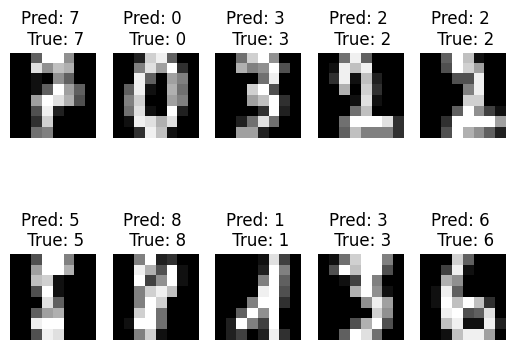

In [48]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test.iloc[i].values.reshape(8,8), cmap='gray')
    # remove axis
    plt.axis('off')
    plt.title(f"Pred: {predictions[i]} \n True: {y_test['class'].iloc[i]}")